Uso de estructuras de datos externas para filtrar DataFrames

Teoría

Ahora que has aprendido sobre los índices de pandas y cómo escribir cadenas de consulta para filtrar datos con el método query(), ya puedes combinar estas habilidades para filtrar DataFrames usando estructuras de datos externas. En esta lección, aprenderás a filtrar utilizando diccionarios, Series e incluso otros DataFrames.

Para ilustrar el papel de los índices en el filtrado, vamos a crear nuestros propios DataFrames en este capítulo. Vamos a repasar brevemente cómo utilizar una lista externa para filtrar nuestro DataFrame con query(). Para averiguar si los valores de la columna 'a' están en la lista our_list, escribiremos la consulta "a in @our_list".

import pandas as pd

our_list = [2, 5, 10]
df = pd.DataFrame(
    {
        'a': [2, 3, 10, 11, 12],
        'b': [5, 4, 3, 2, 1],
        'c': ['X', 'Y', 'Y', 'Y', 'Z'],
    }
)
print(df)
print()
print(our_list)
print()
print(df.query("a in @our_list"))

    a  b  c
0   2  5  X
1   3  4  Y
2  10  3  Y
3  11  2  Y
4  12  1  Z

[2, 5, 10]

    a  b  c
0   2  5  X
2  10  3  Y

Como podemos ver, query() devolvió todas las filas de df donde los valores de la columna 'a' están presentes en our_list. Esos valores son 2 y 10; la columna 'a' no contiene el valor 5.

Ten en cuenta que los valores del índice en el DataFrame filtrado no cambian respecto a sus valores originales, 0 y 2 en este caso.

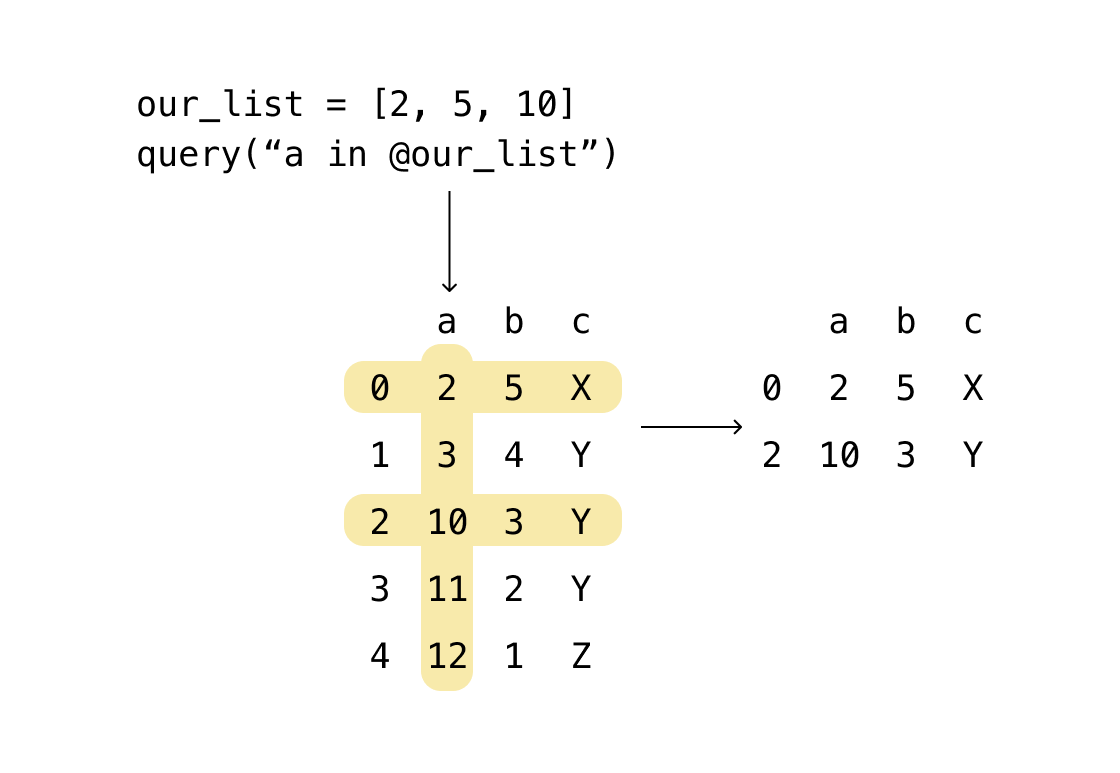

A veces necesitamos crear consultas utilizando una variable que contiene una estructura más complicada que un número o lista independiente, por ejemplo, un diccionario, un objeto Series o un DataFrame.

Filtrado con un diccionario

¿Qué pasa si la variable almacena un diccionario en vez de una lista? Recuerda que los diccionarios se componen de pares clave-valor.

Vamos a crear un diccionario y asignarlo a la variable our_dict. Para comprobar la presencia de valores de la columna 'a' entre los valores del diccionario, tenemos que utilizar el método values() del diccionario en nuestra consulta "a in @our_dict.values()":

import pandas as pd

our_dict = {0: 10, 3: 11, 12: 12}
df = pd.DataFrame(
    {
        'a': [2, 3, 10, 11, 12],
        'b': [5, 4, 3, 2, 1],
        'c': ['X', 'Y', 'Y', 'Y', 'Z'],
    }
)
print(df)
print()
print(our_dict)
print()
print(df.query("a in @our_dict.values()"))

    a  b  c
0   2  5  X
1   3  4  Y
2  10  3  Y
3  11  2  Y
4  12  1  Z

{0: 10, 3: 11, 12: 12}

    a  b  c
2  10  3  Y
3  11  2  Y
4  12  1  Z

Cada uno de los valores del diccionario (10, 11 y 12) aparece en la columna 'a' una vez, por lo que obtenemos tres filas de query(). Los valores del índice en el DataFrame filtrado no han cambiado. Filtrar con valores de diccionario es igual que filtrar con listas.

Filtrado con un Series

Ahora veamos un ejemplo en el que la estructura de datos externa es un objeto Series. Tal y como los diccionarios almacenan pares clave-valor, los objetos Series almacenan pares índice-valor. Sin embargo, en el caso de los objetos Series, los valores se comprueban por defecto.

La consulta "a in @our_series" comprobará la presencia de valores en la columna 'a' entre los valores de our_series en lugar de su índice:

import pandas as pd

our_series = pd.Series([10, 11, 12])

df = pd.DataFrame(
    {
        'a': [2, 3, 10, 11, 12],
        'b': [5, 4, 3, 2, 1],
        'c': ['X', 'Y', 'Y', 'Y', 'Z'],
    }
)

print(df)
print()
print(our_series)
print()
print(df.query("a in @our_series"))

    a  b  c
0   2  5  X
1   3  4  Y
2  10  3  Y
3  11  2  Y
4  12  1  Z

0    10
1    11
2    12
dtype: int64

    a  b  c
2  10  3  Y
3  11  2  Y
4  12  1  Z

Si necesitamos comprobar si los valores de la columna 'a' están presentes entre los valores del índice del Series, entonces tendríamos que utilizar el atributo index: "a in @our_series.index".

Filtrado con un DataFrame

También podemos utilizar un DataFrame externo para filtrar nuestros datos de dos maneras:

Filtrar utilizando sus valores de índice.

Filtrar utilizando valores de columnas específicas.

Para filtrar basándonos en la inclusión entre los valores del índice de un DataFrame externo, simplemente lo tenemos que comprobar de la misma manera que lo hicimos para un índice de Series: accedemos al atributo index en nuestra consulta.

Para comprobar si los valores de la columna del DataFrame que queremos filtrar (df en este caso) también están presentes en la columna de un DataFrame externo (our_df), tenemos que especificar la columna externa en nuestra consulta utilizando la notación de puntos.

La consulta "a in @our_df.a1" comprueba si algunos valores de la columna 'a' de df están presentes en la columna 'a1' de our_df.

Podemos utilizar como atributos la notación de puntos para acceder a las columnas de un DataFrame en lugar de la notación de corchetes, por lo que our_df['a1'] es equivalente a our_df.a1. Pero en los strings de consulta, solo funcionará la notación de puntos.

Práctica guiada

Ejercicio 1

Añade una declaración print() en la que puedes llamar a query() en df y pasarle un string de consulta que compruebe si la columna 'c' está en our_series.index.

In [5]:
import pandas as pd

our_series = pd.Series([10, 11, 12], index=['X', 'Y', 'T'])
df = pd.DataFrame(
    {
        'a': [2, 3, 10, 11, 12],
        'b': [5, 4, 3, 2, 1],
        'c': ['X', 'Y', 'Y', 'Y', 'Z'],
    }
)

print(df.query("c in @our_series.index"))# escribe tu código aquí
"""Para filtrar el DataFrame df usando los valores del índice de 
our_series, puedes usar el método query() y crear una consulta que 
compare la columna 'c' con el índice de our_series. Recuerda que debes 
hacer referencia al índice de our_series con @our_series.
index dentro de la consulta."""

"""Resultado
    a  b  c
0   2  5  X
1   3  4  Y
2  10  3  Y
3  11  2  Y"""

    a  b  c
0   2  5  X
1   3  4  Y
2  10  3  Y
3  11  2  Y


'Resultado\n    a  b  c\n0   2  5  X\n1   3  4  Y\n2  10  3  Y\n3  11  2  Y'

Ejercicio 2

Añade una declaración print() en la que puedes llamar a query() en df y pasarle un string de consulta que compruebe si la columna 'a' está en our_df.b1.

In [4]:
import pandas as pd

df = pd.DataFrame(
    {
        'a': [2, 3, 10, 11, 12],
        'b': [5, 4, 3, 2, 1],
        'c': ['X', 'Y', 'Y', 'Y', 'Z'],
    }
)
our_df = pd.DataFrame(
    {
        'a1': [2, 4, 6],
        'b1': [3, 2, 2],
        'c1': ['A', 'B', 'C'],
    },
    index=['Z', 'X', 'P']
)

print(df.query("a in @our_df.b1"))# escribe tu código aquí


"""Para filtrar el DataFrame df utilizando los valores de la columna 'b1' 
en our_df, puedes usar el método query(). Recuerda hacer referencia a la 
columna 'b1' de our_df dentro de la consulta con @our_df.b1. 
Esto te permitirá verificar si los valores de la columna 'a' en df están 
presentes en la columna 'b1' de our_df."""

"""Resultado
   a  b  c
0  2  5  X
1  3  4  Y"""

   a  b  c
0  2  5  X
1  3  4  Y


'Resultado\n   a  b  c\n0  2  5  X\n1  3  4  Y'

Ejercicio 3

Verifica la presencia de los valores de la columna 'a' entre las claves del diccionario (0, 3 y 12), usando el método query. Puedes realizar la consulta con in si lo deseas.

In [3]:
import pandas as pd

our_dict = {0: 10, 3: 11, 12: 12}
df = pd.DataFrame(
    {
        'a': [2, 3, 10, 11, 12],
        'b': [5, 4, 3, 2, 1],
        'c': ['X', 'Y', 'Y', 'Y', 'Z'],
    }
)
print(df)
print()
print(our_dict)
print()
print(df.query("a in @our_dict"))
# Escribe tu código aquí)

"""Deberás escribir la query al estilo "a in @our_dict.keys()" . 
La consulta más corta "a in @our_dict" también funcionará porque 
comprueba las claves por defecto."""



    a  b  c
0   2  5  X
1   3  4  Y
2  10  3  Y
3  11  2  Y
4  12  1  Z

{0: 10, 3: 11, 12: 12}

    a  b  c
1   3  4  Y
4  12  1  Z


'Deberás escribir la query al estilo "a in @our_dict.keys()" . \nLa consulta más corta "a in @our_dict" también funcionará porque \ncomprueba las claves por defecto.'

Ejercicio 4

Vamos a crear un DataFrame externo llamado our_df con valores de índice establecidos por la lista ['Z', 'X', 'P']. A continuación, podemos comprobar los valores de la columna 'c' para incluirlos en el índice de our_df.

In [2]:
import pandas as pd

df = pd.DataFrame(
    {
        'a': [2, 3, 10, 11, 12],
        'b': [5, 4, 3, 2, 1],
        'c': ['X', 'Y', 'Y', 'Y', 'Z'],
    }
)
our_df = pd.DataFrame(
    {
        'a1': [2, 4, 6],
        'b1': [3, 2, 2],
        'c1': ['A', 'B', 'C'],
    },
    index=['Z', 'X', 'P']
)

print(df)
print()
print(our_df)
print()
print(df.query("c in @our_df.index"))# Escribe tu código aquí)

    a  b  c
0   2  5  X
1   3  4  Y
2  10  3  Y
3  11  2  Y
4  12  1  Z

   a1  b1 c1
Z   2   3  A
X   4   2  B
P   6   2  C

    a  b  c
0   2  5  X
4  12  1  Z


Ejercicio 1

Tienes un DataFrame con información sobre productos en una tienda, incluyendo el nombre del producto, la categoría y el precio. Quieres filtrar los productos que pertenecen a una lista de categorías usando query().

In [6]:
import pandas as pd

# Crear DataFrame de productos
datos = {
    'nombre': ['Laptop', 'Mouse', 'Teclado', 'Monitor', 'Impresora', 'Tablet'],
    'categoría': ['Electrónica', 'Accesorios', 'Accesorios', 'Electrónica', 'Oficina', 'Electrónica'],
    'precio': [1000, 25, 50, 300, 150, 400]
}

productos = pd.DataFrame(datos)
print("Datos de productos:\n", productos)

categorias_deseadas = ['Electrónica', 'Oficina']

productos_filtrados = productos.query('categoría in @categorias_deseadas')# Escribe tu código aquí)

print("\nProductos filtrados por categoría:\n", productos_filtrados)

Datos de productos:
       nombre    categoría  precio
0     Laptop  Electrónica    1000
1      Mouse   Accesorios      25
2    Teclado   Accesorios      50
3    Monitor  Electrónica     300
4  Impresora      Oficina     150
5     Tablet  Electrónica     400

Productos filtrados por categoría:
       nombre    categoría  precio
0     Laptop  Electrónica    1000
3    Monitor  Electrónica     300
4  Impresora      Oficina     150
5     Tablet  Electrónica     400


Ejercicio 2

Tienes dos DataFrames: uno con información de ventas por producto y otro con datos de stock de productos. Tu objetivo es filtrar el DataFrame de ventas usando un Series externo para seleccionar las ventas de productos más vendidos y filtrar los productos del DataFrame de stock según los productos presentes en el DataFrame de ventas.

In [7]:
import pandas as pd

datos_ventas = {
    'producto': ['Laptop', 'Mouse', 'Teclado', 'Monitor', 'Impresora', 'Tablet'],
    'ventas': [150, 500, 300, 120, 80, 200]
}
ventas = pd.DataFrame(datos_ventas)

datos_stock = {
    'producto': ['Laptop', 'Mouse', 'Teclado', 'Monitor', 'Impresora', 'Tablet', 'Cargador'],
    'stock': [50, 200, 150, 75, 30, 100, 60]
}
stock = pd.DataFrame(datos_stock)

print("Datos de ventas:\n", ventas)
print("\nDatos de stock:\n", stock)

productos_más_vendidos = pd.Series(['Mouse', 'Tablet', 'Teclado'])

ventas_filtradas = ventas[ventas['producto'].isin(productos_más_vendidos)] 
# Escribe tu código aquí

print("\nVentas filtradas (productos más vendidos):\n", ventas_filtradas)

Datos de ventas:
     producto  ventas
0     Laptop     150
1      Mouse     500
2    Teclado     300
3    Monitor     120
4  Impresora      80
5     Tablet     200

Datos de stock:
     producto  stock
0     Laptop     50
1      Mouse    200
2    Teclado    150
3    Monitor     75
4  Impresora     30
5     Tablet    100
6   Cargador     60

Ventas filtradas (productos más vendidos):
   producto  ventas
1    Mouse     500
2  Teclado     300
5   Tablet     200
